In [2]:
# imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import collections
import numpy as np

from prepare import prep_riiid
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_classif

### Creating new plots

In [5]:
ntrain = pd.read_csv('train_with_new_features.csv')

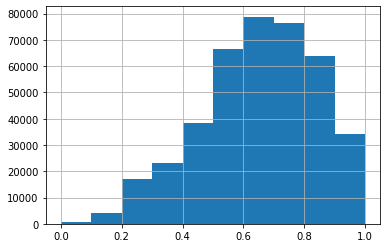

In [9]:
ntrain.mean_content_accuracy.hist()

In [27]:
ntrain['q_diff_bin'] = np.where((ntrain.mean_content_accuracy < .5 ), 'hard', 0)
ntrain['q_diff_bin'] = np.where(((ntrain.mean_content_accuracy >= .5) & (ntrain.mean_content_accuracy <=.7) ), 'medium', ntrain.q_diff_bin)
ntrain['q_diff_bin'] = np.where((ntrain.mean_content_accuracy > .7), 'easy', ntrain.q_diff_bin)

ntrain

,Unnamed: 0,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_bundle_accuracy,mean_part_accuracy,mean_tags_accuracy,mean_tagcount_accuracy,q_diff_bin
0,0,1,0,0.630049,0,45951.0,11917302.0,0.818182,0.682248,0.818182,0.610488,0.791067,0.615325,easy
1,1,0,0,0.630049,0,28391.0,11917302.0,0.550000,0.534988,0.550000,0.610488,0.650256,0.615325,medium
2,2,1,0,0.630049,0,22436.0,11917302.0,0.444444,0.445216,0.444444,0.610488,0.600555,0.615325,hard
3,3,1,0,0.630049,0,36191.0,11917302.0,0.406250,0.544008,0.406250,0.610488,0.622619,0.615325,hard
4,4,0,0,0.630049,0,24322.0,11917302.0,0.687500,0.485282,0.687500,0.610488,0.616616,0.615325,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403372,403372,1,0,0.833333,0,24856.0,22800.0,0.438849,0.616805,0.438849,0.740719,0.477387,0.667953,hard
403373,403373,0,0,0.833333,0,21001.0,22800.0,0.546392,0.619494,0.546392,0.740719,0.656319,0.667953,medium
403374,403374,0,0,0.833333,0,17922.0,22800.0,0.359574,0.622137,0.359574,0.740719,0.526579,0.667953,hard
403375,403375,0,0,0.833333,0,25895.0,22800.0,0.323077,0.602956,0.323077,0.740719,0.711957,0.667953,hard


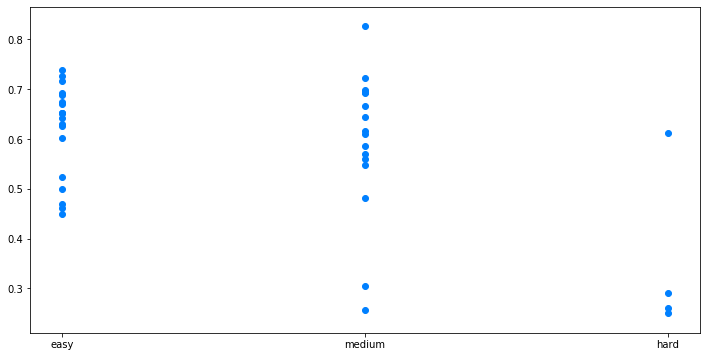

In [28]:
n1train = ntrain.sample(frac=0.0001, replace=False, random_state=1)

fig = plt.figure(figsize=(12,6))
x = n1train.q_diff_bin
y = n1train.user_acc_mean
plt.scatter(x, y, marker='o',color='#0080ff')

In [75]:
ntrain[(ntrain.task_container_id == 17) & (ntrain.content_type_id == 0) & (ntrain.user_id==252883885) ].head(50)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
65434,771225,252883885,10686,0,17,1,0,14000.0,True,NaN,NaN,NaN,NaN,10686.0,10686.0,0.0,2.0,62 137 142 38 29


In [76]:
ntrain[(ntrain.user_id==252883885) ][].head(50)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
65417,0,252883885,5177,0,0,3,0,NaN,NaN,NaN,NaN,NaN,NaN,5177.0,5177.0,1.0,5.0,167
65418,21830,252883885,5326,0,1,1,1,21000.0,False,NaN,NaN,NaN,NaN,5326.0,5326.0,1.0,5.0,25
65419,43182,252883885,3551,0,2,0,1,16000.0,False,NaN,NaN,NaN,NaN,3551.0,3551.0,0.0,5.0,8
65420,85155,252883885,6477,0,3,2,0,17000.0,False,NaN,NaN,NaN,NaN,6477.0,6477.0,1.0,5.0,173
65421,96577,252883885,4954,0,4,1,1,38000.0,False,NaN,NaN,NaN,NaN,4954.0,4954.0,1.0,5.0,8
65422,133010,252883885,5580,0,5,1,1,8000.0,False,NaN,NaN,NaN,NaN,5580.0,5580.0,1.0,5.0,8
65423,185989,252883885,6650,0,6,1,1,33000.0,False,NaN,NaN,NaN,NaN,6650.0,6650.0,1.0,5.0,53
65424,222005,252883885,5269,0,7,3,0,49000.0,False,NaN,NaN,NaN,NaN,5269.0,5269.0,2.0,5.0,55
65425,280410,252883885,3577,0,8,0,1,32000.0,False,NaN,NaN,NaN,NaN,3577.0,3577.0,0.0,5.0,8
65426,318983,252883885,4536,0,9,2,0,55000.0,False,NaN,NaN,NaN,NaN,4536.0,4536.0,3.0,5.0,96


In [49]:
ntrain[ntrain.content_id != ntrain.bundle_id].head(50)



,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
17,1142732,1864702,21852,1,17,-1,-1,NaN,False,21852.0,17.0,2.0,concept,NaN,NaN,NaN,NaN,NaN
25,74225765,1864702,26516,1,26,-1,-1,NaN,False,26516.0,1.0,5.0,concept,NaN,NaN,NaN,NaN,NaN
57,85556780,1864702,6808,1,57,-1,-1,NaN,False,6808.0,-127.0,2.0,intention,6808.0,6805.0,1.0,6.0,27
60,85752808,1864702,1554,0,59,2,1,18000.0,True,NaN,NaN,NaN,NaN,1554.0,1553.0,2.0,3.0,136 162 38 81
61,85752808,1864702,1555,0,59,0,0,18000.0,True,NaN,NaN,NaN,NaN,1555.0,1553.0,1.0,3.0,82 38 81
62,85927546,1864702,1720,0,60,3,1,26340.0,True,NaN,NaN,NaN,NaN,1720.0,1718.0,3.0,3.0,113 162 92 29
63,85927546,1864702,1719,0,60,2,0,26340.0,True,NaN,NaN,NaN,NaN,1719.0,1718.0,1.0,3.0,82 92 29
65,86081976,1864702,1791,0,61,2,0,30340.0,True,NaN,NaN,NaN,NaN,1791.0,1790.0,3.0,3.0,157 38 29
66,86081976,1864702,1792,0,61,1,1,30340.0,True,NaN,NaN,NaN,NaN,1792.0,1790.0,1.0,3.0,136 38 29
68,86211931,1864702,1519,0,62,2,1,27660.0,True,NaN,NaN,NaN,NaN,1519.0,1517.0,2.0,3.0,157 38 102


In [23]:
ntrain.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89


In [22]:
ntrain.nunique()

timestamp                         312679
user_id                             2000
content_id                         12774
content_type_id                        2
task_container_id                   9175
user_answer                            5
answered_correctly                     3
prior_question_elapsed_time          595
prior_question_had_explanation         2
lecture_id                           398
tag                                  151
lecture_part                           7
type_of                                4
question_id                        12533
bundle_id                           9147
correct_answer                         4
question_part                          7
tags                                1485
dtype: int64

### Exploring user id vs timestamp plot to understand findings

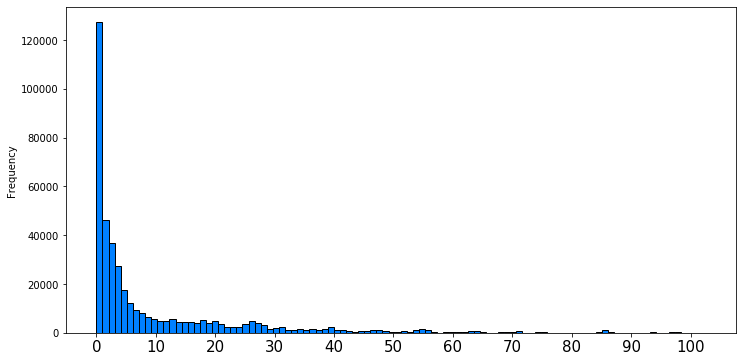

In [20]:
# User_id vs Timestamp
# Had to convert time from in milliseconds to weeks
ts = ntrain['timestamp']/(31536000000/52)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100, color='#0080ff', ec='black') 
#plt.title("Most Users Leave After First Week", fontsize=20)
#plt.xlabel("Weeks Of Interaction", fontsize=15)
#plt.ylabel("Number of Users (in Thousands)", fontsize=15)
plt.xticks(np.linspace(0,100,11),rotation=0, fontsize=15)
#plt.yticks([20000,40000,60000,80000,100000,120000],labels=['20','40','60','80','100','120'], rotation=0, fontsize=15)
plt.show() 

In [13]:
ts

0         0.000000
1         0.000076
2         0.000123
3         0.000160
4         0.000219
            ...   
411512    0.000937
411513    0.000978
411514    0.001013
411515    0.001042
411516    0.001085
Name: timestamp, Length: 411517, dtype: float64

In [33]:
def KBest_ranker(X, y, n):
   """
   Returns the top n selected features based on the SelectKBest calss
   Parameters: predictors(X) in df, target(y) in df, the number of features to select(n)
   """
   f_selector = SelectKBest(f_classif, k=n)
   f_selector = f_selector.fit(X, y)
   f_support = f_selector.get_support()
   f_feature = X.iloc[:, f_support].columns.tolist()
   df_features = pd.DataFrame({'Features': f_feature, 
                                'Rank': range(1, n+1)})
   return df_features

In [37]:
X = ntrain[['question_had_explanation', 'user_acc_mean',
       'user_lectures_running_total', 'q_time', 'avg_user_q_time',
       'mean_content_accuracy', 'mean_task_accuracy', 'mean_bundle_accuracy',
       'mean_part_accuracy', 'mean_tags_accuracy', 'mean_tagcount_accuracy']]

y = ntrain['answered_correctly']

KBest_ranker(X, y, 10)



,Features,Rank
0,question_had_explanation,1
1,user_acc_mean,2
2,user_lectures_running_total,3
3,avg_user_q_time,4
4,mean_content_accuracy,5
5,mean_task_accuracy,6
6,mean_bundle_accuracy,7
7,mean_part_accuracy,8
8,mean_tags_accuracy,9
9,mean_tagcount_accuracy,10


In [35]:
ntrain

,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_bundle_accuracy,mean_part_accuracy,mean_tags_accuracy,mean_tagcount_accuracy
0,1,0,0.630049,0,45951.0,11917302.0,0.818182,0.682248,0.818182,0.610488,0.791067,0.615325
1,0,0,0.630049,0,28391.0,11917302.0,0.550000,0.534988,0.550000,0.610488,0.650256,0.615325
2,1,0,0.630049,0,22436.0,11917302.0,0.444444,0.445216,0.444444,0.610488,0.600555,0.615325
3,1,0,0.630049,0,36191.0,11917302.0,0.406250,0.544008,0.406250,0.610488,0.622619,0.615325
4,0,0,0.630049,0,24322.0,11917302.0,0.687500,0.485282,0.687500,0.610488,0.616616,0.615325
...,...,...,...,...,...,...,...,...,...,...,...,...
403372,1,0,0.833333,0,24856.0,22800.0,0.438849,0.616805,0.438849,0.740719,0.477387,0.667953
403373,0,0,0.833333,0,21001.0,22800.0,0.546392,0.619494,0.546392,0.740719,0.656319,0.667953
403374,0,0,0.833333,0,17922.0,22800.0,0.359574,0.622137,0.359574,0.740719,0.526579,0.667953
403375,0,0,0.833333,0,25895.0,22800.0,0.323077,0.602956,0.323077,0.740719,0.711957,0.667953


### Split data set work

In [3]:
train = pd.read_csv('train.csv')
validate = pd.read_csv('validate.csv')
test = pd.read_csv('test.csv')

In [4]:
train, validate, test, train_s, validate_s, test_s = prep_riiid(train, validate, test)

FileNotFoundError: [Errno 2] File questions_with_tag_counts.csv does not exist: 'questions_with_tag_counts.csv'

In [13]:
train

,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,0,0.630049,0,45951.0,11917302.0,0.818182,0.682248,6.514429e+09,22241.021251
1,0,0,0.630049,0,28391.0,11917302.0,0.550000,0.534988,6.514429e+09,22241.021251
2,1,0,0.630049,0,22436.0,11917302.0,0.444444,0.445216,6.514429e+09,22241.021251
3,1,0,0.630049,0,36191.0,11917302.0,0.406250,0.544008,6.514429e+09,22241.021251
4,0,0,0.630049,0,24322.0,11917302.0,0.687500,0.485282,6.514429e+09,22241.021251
...,...,...,...,...,...,...,...,...,...,...
403372,1,0,0.833333,0,24856.0,22800.0,0.438849,0.616805,3.284642e+05,17300.000000
403373,0,0,0.833333,0,21001.0,22800.0,0.546392,0.619494,3.284642e+05,17300.000000
403374,0,0,0.833333,0,17922.0,22800.0,0.359574,0.622137,3.284642e+05,17300.000000
403375,0,0,0.833333,0,25895.0,22800.0,0.323077,0.602956,3.284642e+05,17300.000000


## Hypothesis Test 1

### General Inquiry
<br>
Does a student receiving an explanation prior to a question have a connection with whether or not they'll answer it correctly?

### Chi-Squared Test

H0: question_had_explanation and answered_correctly are independent
<br>
Ha: question_had_explanation and answered_correctly are dependant

In [5]:
import scipy.stats as stats

# creating crosstab of data reflecting if question 
# was answered correctly and if it had an explanation
observed_pqhe = pd.crosstab(train.answered_correctly, 
                            train.question_had_explanation)

# displaying crosstab
observed_pqhe

question_had_explanation,0,1
answered_correctly,,
0,21210,119596
1,21974,240597


In [59]:
# calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_pqhe)

# printing results
print('alpha = .05\n')
print(f'p = {p:.4f}')

alpha = .05

p = 0.0000


- p is less than alpha so we reject the null hypothesis that answered_correctly and question_had_explanation are independent

## Hypothesis Test 2

### General Inquiry
<br>
Is there a linear relationship between the average time it takes a user to answer a question and their average accuracy?

### Pearson Correlation Test

H0: There is no linear relationship between avg_user_q_time and user_acc_mean
<br>
Ha: There is a linear relationship between avg_user_q_time and user_acc_mean

In [60]:
# performing pearson correlation test
r, p = stats.pearsonr(train.avg_user_q_time, train.user_acc_mean)

# displaying alpha and test results
print("alpha = .05\n")
print("r correlation coefficient", r)
print("p value                   ", p)

alpha = .05

r correlation coefficient -0.053798627856180434
p value                    3.0491148951959335e-256


- p is less than alpha so we reject the null hypothesis that there is no linear relationship between avg_user_q_time and user_acc_mean

- Given the r correlation coefficient of -.06, we see that there is an extremely weak inverse linear relationship between the variables


## Hypothesis Test 3

### General Inquiry
<br>
Users with higher accuracy tend to take less time to answer questions than others. Is this still the case when it comes to difficult questions (questions with below average content accuracy)?

### Two-Sample One-Tailed T-Test
H0: The avg time that users with above avg accuracy spend on questions with below avg content accuracy is equal to the avg time that users with avg or below accuracy spend on them.
<br><br>
Ha: The avg time that users with above avg accuracy spend on questions with below avg content accuracy is less than the avg time that users with avg or below accuracy spend on them.

In [43]:
# creating df of all questions that had less than average mean_content_accuracy
# ie. all questions that users answered incorrectly more often than average
hard_questions = train[train.mean_content_accuracy < train.mean_content_accuracy.mean()]

# filtering DF above for all users with above avg accuracy
hi_acc_users = hard_questions[hard_questions.user_acc_mean > hard_questions.user_acc_mean.mean()]

# filtering DF above for all users with avg or below accuracy
low_acc_users = hard_questions[hard_questions.user_acc_mean <= hard_questions.user_acc_mean.mean()]


In [66]:
# performing two sample, one tailed t-test
t, p = stats.ttest_ind(hi_acc_users.q_time, low_acc_users.q_time, equal_var = False)

# printing alpha and test results
print('alpha = .05\n')
print("test statistic   ", t)
print("p value           ", p/2)

alpha = .05

test statistic    -4.004107297628978
p value            3.1132421415022635e-05


- p is less than alpha and the test statistic value is negative so we can reject the null hypothesis 
- If users with above average accuracy are answering questions (difficult and otherwise) more quickly than others users, then they may be more well prepared for the content they're facing
- If the above avg accuracy users spent more time on difficult questions than others it would suggest that they may not be more well prepared, but rather that they are more cognizant of when they've approached difficult questions that they should take their time with

## Hypothesis Test 4

### General Hypothesis
<br>
Is their a linear relationship between the amount of lectures a user has viewed and their task performance? Task performance is measured by a users overall performance on each bundle of questions. A bundle can contain 1 or more questions.

### Pearson Correlation Test

H0: There is no linear relationship between user_lectures_running_total and mean_task_accuracy
<br>
Ha: There is a linear relationship between user_lectures_running_total and mean_task_accuracy

In [57]:
# performing pearson correlation test
r, p = stats.pearsonr(train.user_lectures_running_total, train.mean_task_accuracy)

# printing alpha and results
print("alpha = .05\n")
print("r correlation coefficient", r)
print("p value                  ", p)

alpha = .05

r correlation coefficient 0.2274324052632397
p value                   0.0


- Since p is less than alpha we will reject the null hypothesis that there is no linear relationship between mean_task_accuracy and user_lectures_running_total
- The r correlation coefficient of .22 indicates that there is a weak linear relationship between these variables
    - As the amount of lectures that a user has seen increases, so does their task accuracy on average
    - Viewing lectures may be having a positive, albeit weak impact on user performance

### Split data set work (RFE Ranker)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

def rfe_ranker(train):
    """
    Accepts dataframe. Uses Recursive Feature Elimination to rank the given df's features in order of their usefulness in
    predicting logerror with a logistic regression model.
    """
    non_target_vars = ['question_had_explanation', 'user_acc_mean',
       'mean_content_accuracy', 'mean_task_accuracy',
       'mean_timestamp_accuracy_scaled', 'mean_priortime_accuracy_scaled',
       'user_lectures_running_total_scaled', 'avg_user_q_time_scaled']
    
    target_var = ['answered_correctly']
    
    # creating logistic regression object
    lr = LogisticRegression()

    # fitting logistic regression model to features 
    lr.fit(train[non_target_vars], train[target_var])

    # creating recursive feature elimination object and specifying to only rank 1 feature as best
    rfe = RFE(lr, 1)

    # using rfe object to transform features 
    rfe.fit_transform(train[non_target_vars], train[target_var])

    # creating mask of selected feature
    feature_mask = rfe.support_

    # creating train df for rfe object 
    rfe_train = train[non_target_vars]

    # creating ranked list 
    feature_ranks = rfe.ranking_

    # creating list of feature names
    feature_names = rfe_train.columns.tolist()

    # create df that contains all features and their ranks
    rfe_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

    # return df sorted by rank
    return rfe_ranks_df.sort_values('Rank')

In [18]:
# using rfe_ranker function from explore.py to rank each feature's viability as a 
# logistic regression feature that can be used to predict the answered_correctly variable
rfe_ranker(train_s).head(5)

,Feature,Rank
2,mean_content_accuracy,1
1,user_acc_mean,2
3,mean_task_accuracy,3
7,avg_user_q_time_scaled,4
0,question_had_explanation,5


In [30]:
validate.columns

Index(['answered_correctly', 'prior_question_had_explanation', 'user_acc_mean',
       'user_lectures_running_total', 'avg_user_q_time',
       'mean_content_accuracy', 'mean_task_accuracy',
       'mean_timestamp_accuracy', 'mean_priortime_accuracy'],
      dtype='object')

In [32]:
train_s.columns

Index(['answered_correctly', 'prior_question_had_explanation', 'user_acc_mean',
       'mean_content_accuracy', 'mean_task_accuracy',
       'mean_timestamp_accuracy_scaled', 'mean_priortime_accuracy_scaled',
       'user_lectures_running_total_scaled', 'avg_user_q_time_scaled'],
      dtype='object')

['prior_question_had_explanation', 'user_acc_mean',
       'user_lectures_running_total', 'avg_user_q_time',
       'mean_content_accuracy', 'mean_task_accuracy',
       'mean_timestamp_accuracy', 'mean_priortime_accuracy']

## Updated sample set work

In [2]:
dfst = pd.read_csv('sampled_trainset.csv')

In [10]:
dfst[dfst.user_id == 1864702].head(50)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89
5,157291,1864702,5592,0,5,3,0,33000.0,False,NaN,NaN,NaN,NaN,5592.0,5592.0,0.0,5.0,7
6,196365,1864702,3603,0,6,0,0,22000.0,False,NaN,NaN,NaN,NaN,3603.0,3603.0,1.0,5.0,166
7,579792,1864702,236,0,7,3,1,36000.0,False,NaN,NaN,NaN,NaN,236.0,236.0,3.0,2.0,129 17 56 38 102
8,632523,1864702,824,0,8,1,0,23000.0,True,NaN,NaN,NaN,NaN,824.0,824.0,0.0,2.0,17 56 81 92
9,671867,1864702,739,0,9,0,1,26000.0,True,NaN,NaN,NaN,NaN,739.0,739.0,0.0,2.0,143 20 38 81


In [5]:
dfst[dfst.prior_question_elapsed_time == np.inf]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173
38,74921787,1864702,3704,0,38,3,1,inf,True,NaN,NaN,NaN,NaN,3704.0,3704.0,3.0,5.0,60
261,397232836,1864702,6626,0,211,3,1,inf,True,NaN,NaN,NaN,NaN,6626.0,6625.0,3.0,6.0,53
262,397232836,1864702,6627,0,211,1,1,inf,True,NaN,NaN,NaN,NaN,6627.0,6625.0,1.0,6.0,179
263,397232836,1864702,6625,0,211,0,1,inf,True,NaN,NaN,NaN,NaN,6625.0,6625.0,0.0,6.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411474,3076575081,2145030352,7286,0,581,1,1,inf,True,NaN,NaN,NaN,NaN,7286.0,7283.0,1.0,7.0,97 37 21
411475,3076575081,2145030352,7283,0,581,3,1,inf,True,NaN,NaN,NaN,NaN,7283.0,7283.0,3.0,7.0,37 153 21
411481,3094536898,2145030352,9798,0,587,3,1,inf,True,NaN,NaN,NaN,NaN,9798.0,9798.0,3.0,5.0,73
411482,3094632067,2145030352,4529,0,588,1,1,inf,True,NaN,NaN,NaN,NaN,4529.0,4529.0,1.0,5.0,166


## Train1000 Dataset Work

In [3]:
train = pd.read_csv('train1000.csv')

Features engineering - Part 1: how to measure the historical performance for each user 

mean user accuracy

how many lectures they have been reviewed

mean time to answer each question

mean time to answer the prior question

whether prior question had been explained or not


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296615 entries, 0 to 296614
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   user_id                         296615 non-null  int64  
 1   row_id                          296615 non-null  int64  
 2   timestamp                       296615 non-null  int64  
 3   content_id                      296615 non-null  int64  
 4   content_type_id                 296615 non-null  int64  
 5   task_container_id               296615 non-null  int64  
 6   user_answer                     296615 non-null  int64  
 7   answered_correctly              296615 non-null  int64  
 8   prior_question_elapsed_time     289945 non-null  float64
 9   prior_question_had_explanation  295617 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 22.6+ MB


In [8]:
train[train.prior_question_elapsed_time.isnull()]

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,115,0,0,5692,0,1,3,1,NaN,NaN
46,124,46,0,7900,0,0,0,1,NaN,NaN
76,2746,76,0,5273,0,0,1,0,NaN,NaN
89,2746,89,653762,6808,1,14,-1,-1,NaN,False
96,5382,96,0,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
296498,5566848,296498,162115714,32168,1,21,-1,-1,NaN,False
296509,5568049,296509,0,6028,0,0,3,0,NaN,NaN
296537,5568049,296537,7746409318,24250,1,20,-1,-1,NaN,False
296586,5571864,296586,0,4205,0,0,1,1,NaN,NaN


## Create mean user accuracy column

In [31]:
user_acc_mean = pd.DataFrame(train.groupby('user_id')['answered_correctly'].mean())

user_acc_mean.columns = ['user_acc_mean']

user_acc_mean.head()

,user_acc_mean
user_id,
115,0.695652
124,0.233333
2746,0.500000
5382,0.632812
8623,0.598214


In [32]:
train1 = train.merge(user_acc_mean, how='left', left_on='user_id', right_on='user_id')

train1

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_acc_mean
0,115,0,0,5692,0,1,3,1,NaN,NaN,0.695652
1,115,1,56943,5716,0,2,2,1,37000.0,False,0.695652
2,115,2,118363,128,0,0,0,1,55000.0,False,0.695652
3,115,3,131167,7860,0,3,0,1,19000.0,False,0.695652
4,115,4,137965,7922,0,4,1,1,11000.0,False,0.695652
...,...,...,...,...,...,...,...,...,...,...,...
296610,5577726,296610,625311764,5328,0,7,0,0,20000.0,False,0.416667
296611,5577726,296611,625327721,4303,0,8,3,0,10000.0,True,0.416667
296612,5577726,296612,625344560,4445,0,9,0,1,6000.0,True,0.416667
296613,5577726,296613,625367161,5206,0,10,1,0,6000.0,True,0.416667


## Create lecture view count column

In [33]:
train['user_lectures_rt'] = train.groupby(by=['user_id'])['content_type_id'].transform(lambda x: x.cumsum())

In [34]:
train.head(50)

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_lectures_rt
0,115,0,0,5692,0,1,3,1,NaN,NaN,0
1,115,1,56943,5716,0,2,2,1,37000.0,False,0
2,115,2,118363,128,0,0,0,1,55000.0,False,0
3,115,3,131167,7860,0,3,0,1,19000.0,False,0
4,115,4,137965,7922,0,4,1,1,11000.0,False,0
5,115,5,157063,156,0,5,2,1,5000.0,False,0
6,115,6,176092,51,0,6,0,1,17000.0,False,0
7,115,7,194190,50,0,7,3,1,17000.0,False,0
8,115,8,212463,7896,0,8,2,1,16000.0,False,0
9,115,9,230983,7863,0,9,0,1,16000.0,False,0


## Create time to answer prior question column

In [35]:
lastq = pd.DataFrame(train.timestamp.diff())

lastq.columns = ['last_q_time']

lastq.fillna(0)

train = pd.concat([train, lastq], axis=1)

In [36]:
train['last_q_time'] = np.where((train.last_q_time.isnull()), 0, train.last_q_time)
train['last_q_time'] = np.where((train.last_q_time < 0), 0, train.last_q_time)

In [37]:
# set to loop number of times == largest number of questions in bundle
train['last_q_time'] = np.where((train.last_q_time ==  0) & 
                                (train.prior_question_elapsed_time.isnull() != True), 
                                train.last_q_time.shift(1), train.last_q_time)

In [38]:
train.head(50)

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_lectures_rt,last_q_time
0,115,0,0,5692,0,1,3,1,NaN,NaN,0,0.0
1,115,1,56943,5716,0,2,2,1,37000.0,False,0,56943.0
2,115,2,118363,128,0,0,0,1,55000.0,False,0,61420.0
3,115,3,131167,7860,0,3,0,1,19000.0,False,0,12804.0
4,115,4,137965,7922,0,4,1,1,11000.0,False,0,6798.0
5,115,5,157063,156,0,5,2,1,5000.0,False,0,19098.0
6,115,6,176092,51,0,6,0,1,17000.0,False,0,19029.0
7,115,7,194190,50,0,7,3,1,17000.0,False,0,18098.0
8,115,8,212463,7896,0,8,2,1,16000.0,False,0,18273.0
9,115,9,230983,7863,0,9,0,1,16000.0,False,0,18520.0


## Average time to answer question

In [39]:
avg_q_time_user = pd.DataFrame(train.groupby('user_id').mean().round()['last_q_time'])

avg_q_time_user.columns = ['avg_q_time_user']

avg_q_time_user 

,avg_q_time_user
user_id,
115,14528661.0
124,30605.0
2746,41773.0
5382,16418371.0
8623,9222170.0
...,...
5555086,84391.0
5566848,102265390.0
5568049,101314683.0


In [40]:
train2 = train.merge(avg_q_time_user, how='left', left_on='user_id', right_on='user_id')

In [41]:
train2.head(100)

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_lectures_rt,last_q_time,avg_q_time_user
0,115,0,0,5692,0,1,3,1,NaN,NaN,0,0.0,14528661.0
1,115,1,56943,5716,0,2,2,1,37000.0,False,0,56943.0,14528661.0
2,115,2,118363,128,0,0,0,1,55000.0,False,0,61420.0,14528661.0
3,115,3,131167,7860,0,3,0,1,19000.0,False,0,12804.0,14528661.0
4,115,4,137965,7922,0,4,1,1,11000.0,False,0,6798.0,14528661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2746,95,835457,484,0,19,0,1,20000.0,True,1,35202.0,41773.0
96,5382,96,0,5000,0,0,0,1,NaN,NaN,0,0.0,16418371.0
97,5382,97,39828,3944,0,1,1,0,24000.0,False,0,39828.0,16418371.0
98,5382,98,132189,217,0,2,0,1,35000.0,False,0,92361.0,16418371.0


## Creating function containing all feature engineering above

In [44]:
def sam_train_features(df):
    
    # average user accuracy
    user_acc_mean = pd.DataFrame(df.groupby('user_id')['answered_correctly'].mean())
    user_acc_mean.columns = ['user_acc_mean']
    df = df.merge(user_acc_mean, how = 'left', left_on = 'user_id', right_on = 'user_id')
    
    # running count of lectures viewed per user
    df['user_lectures_running_total'] = df.groupby(by=['user_id'])['content_type_id'].transform(lambda x: x.cumsum())
    
    # time taken to answer previous question
    lastq = pd.DataFrame(df.timestamp.diff())

    lastq.columns = ['last_q_time']

    lastq.fillna(0)

    df = pd.concat([df, lastq], axis=1)
    
    df['last_q_time'] = np.where((df.last_q_time.isnull()), 0, df.last_q_time)
    df['last_q_time'] = np.where((df.last_q_time < 0), 0, df.last_q_time)
    
    for x in range(0,5):
    # set to loop number of times == largest count of questions in bundle
        df['last_q_time'] = np.where((df.last_q_time ==  0) & (df.prior_question_elapsed_time.isnull() != True), df.last_q_time.shift(1), df.last_q_time)
    
    # avg time each user takes a question
    avg_q_time_user = pd.DataFrame(df.groupby('user_id').mean().round()['last_q_time'])
    
    avg_q_time_user.columns = ['avg_user_q_time']
    
    df = df.merge(avg_q_time_user, how='left', left_on='user_id', right_on='user_id')
    
    return df

In [45]:
def sam_valtest_features(df, val_or_test):
    
    # average user accuracy
    user_acc_mean = pd.DataFrame(df.groupby('user_id')['answered_correctly'].mean())
    user_acc_mean.columns = ['user_acc_mean']
    val_or_test = val_or_test.merge(user_acc_mean, how = 'left', left_on = 'user_id', right_on = 'user_id')
    
    # running count of lectures viewed per user
    val_or_test['user_lectures_running_total'] = val_or_test.groupby(by=['user_id'])['content_type_id'].transform(lambda x: x.cumsum())
    
    # time taken to answer previous question
    lastq = pd.DataFrame(df.timestamp.diff())

    lastq.columns = ['last_q_time']

    lastq.fillna(0)

    df = pd.concat([df, lastq], axis=1)
    
    df['last_q_time'] = np.where((df.last_q_time.isnull()), 0, df.last_q_time)
    df['last_q_time'] = np.where((df.last_q_time < 0), 0, df.last_q_time)
    
    for x in range(0,5):
    # set to loop number of times == largest count of questions in bundle
        df['last_q_time'] = np.where((df.last_q_time ==  0) & (df.prior_question_elapsed_time.isnull() != True), df.last_q_time.shift(1), df.last_q_time)
    
    # avg time each user takes a question
    avg_q_time_user = pd.DataFrame(df.groupby('user_id').mean().round()['last_q_time'])
    
    avg_q_time_user.columns = ['avg_user_q_time']
    
    val_or_test = val_or_test.merge(avg_q_time_user, how='left', left_on='user_id', right_on='user_id')
    
    return val_or_test

In [46]:
val = train.copy()

In [47]:
def sam_valtest_features(df, val_or_test):
    
    # average user accuracy
    user_acc_mean = pd.DataFrame(df.groupby('user_id')['answered_correctly'].mean())
    user_acc_mean.columns = ['user_acc_mean']
    val_or_test = val_or_test.merge(user_acc_mean, how = 'left', left_on = 'user_id', right_on = 'user_id')
    
    # running count of lectures viewed per user
    val_or_test['user_lectures_running_total'] = val_or_test.groupby(by=['user_id'])['content_type_id'].transform(lambda x: x.cumsum())
    
    # time taken to answer previous question
    lastq = pd.DataFrame(df.timestamp.diff())

    lastq.columns = ['last_q_time']

    lastq.fillna(0)

    df = pd.concat([df, lastq], axis=1)
    
    df['last_q_time'] = np.where((df.last_q_time.isnull()), 0, df.last_q_time)
    df['last_q_time'] = np.where((df.last_q_time < 0), 0, df.last_q_time)
    
    for x in range(0,5):
    # set to loop number of times == largest count of questions in bundle
        df['last_q_time'] = np.where((df.last_q_time ==  0) & (df.prior_question_elapsed_time.isnull() != True), df.last_q_time.shift(1), df.last_q_time)
    
    # avg time each user takes a question
    avg_q_time_user = pd.DataFrame(df.groupby('user_id').mean().round()['last_q_time'])
    
    avg_q_time_user.columns = ['avg_user_q_time']
    
    val_or_test = val_or_test.merge(avg_q_time_user, how='left', left_on='user_id', right_on='user_id')
    
    return val_or_test

In [50]:
train1

,user_id,row_id,timestamp,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_acc_mean
0,115,0,0,5692,0,1,3,1,NaN,NaN,0.695652
1,115,1,56943,5716,0,2,2,1,37000.0,False,0.695652
2,115,2,118363,128,0,0,0,1,55000.0,False,0.695652
3,115,3,131167,7860,0,3,0,1,19000.0,False,0.695652
4,115,4,137965,7922,0,4,1,1,11000.0,False,0.695652
...,...,...,...,...,...,...,...,...,...,...,...
296610,5577726,296610,625311764,5328,0,7,0,0,20000.0,False,0.416667
296611,5577726,296611,625327721,4303,0,8,3,0,10000.0,True,0.416667
296612,5577726,296612,625344560,4445,0,9,0,1,6000.0,True,0.416667
296613,5577726,296613,625367161,5206,0,10,1,0,6000.0,True,0.416667


## Code prior to local file acquire method

In [24]:
len(train[(train.user_id == 115) & (train.answered_correctly == 1)])

32

In [25]:
len(train[(train.user_id == 115) & (train.answered_correctly == 0)])

14

In [28]:
train[train.user_id == 115].shape

(46, 10)

In [30]:
32/46

0.6956521739130435

In [3]:
df_train = pd.read_csv('train.csv')
df_lectures = pd.read_csv('lectures.csv')
df_questions = pd.read_csv('questions.csv')

In [3]:
df_train.shape

(101230332, 10)

In [4]:
df_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
df_lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [6]:
df_questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [7]:
df_merge_1 = df_train.merge(df_questions, how='left', left_on='content_id', right_on='question_id')

In [8]:
df_merge_1.shape

(101230332, 15)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [10]:
df_merge_1[df_merge_1.user_id == 115]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,NaN,NaN,5692.0,5692.0,3.0,5.0,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,5716.0,2.0,5.0,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128.0,128.0,0.0,1.0,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,7860.0,0.0,1.0,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922.0,7922.0,1.0,1.0,131 149 92
5,5,157063,115,156,0,5,2,1,5000.0,False,156.0,156.0,2.0,1.0,131 101 162 38
6,6,176092,115,51,0,6,0,1,17000.0,False,51.0,51.0,0.0,1.0,131 187 81
7,7,194190,115,50,0,7,3,1,17000.0,False,50.0,50.0,3.0,1.0,131 101 38
8,8,212463,115,7896,0,8,2,1,16000.0,False,7896.0,7896.0,2.0,1.0,131 104 162 81
9,9,230983,115,7863,0,9,0,1,16000.0,False,7863.0,7863.0,0.0,1.0,131 68 92


In [11]:
df_merge_1[df_merge_1.user_id == 124]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
46,46,0,124,7900,0,0,0,1,NaN,NaN,7900.0,7900.0,0.0,1.0,131 93 81
47,47,32683,124,7876,0,1,0,0,26000.0,False,7876.0,7876.0,3.0,1.0,10 94 92
48,48,62000,124,175,0,2,2,1,29000.0,False,175.0,175.0,2.0,1.0,9 10 92
49,49,83632,124,1278,0,3,1,0,26000.0,False,1278.0,1278.0,3.0,2.0,143 140 81 29
50,50,189483,124,2064,0,4,2,0,18000.0,False,2064.0,2063.0,1.0,3.0,157 92 29
51,51,189483,124,2063,0,4,3,0,18000.0,False,2063.0,2063.0,0.0,3.0,136 92 29
52,52,189483,124,2065,0,4,2,1,18000.0,False,2065.0,2063.0,2.0,3.0,136 162 92 29
53,53,258793,124,3364,0,5,2,0,33333.0,False,3364.0,3363.0,1.0,4.0,136 103 29
54,54,258793,124,3365,0,5,3,0,33333.0,False,3365.0,3363.0,2.0,4.0,136 103 29
55,55,258793,124,3363,0,5,0,0,33333.0,False,3363.0,3363.0,3.0,4.0,74 103 29


In [12]:
df_merge_2 = df_merge_1.merge(df_lectures, how='left', left_on='content_id', right_on='lecture_id')


In [13]:
df_merge_2.shape

(101230332, 19)

In [14]:
df_merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101230332 entries, 0 to 101230331
Data columns (total 19 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
 10  question_id                     float64
 11  bundle_id                       float64
 12  correct_answer                  float64
 13  part_x                          float64
 14  tags                            object 
 15  lecture_id                      float64
 16  tag                             float64
 17  part_y                 

In [15]:
train = df_merge_2.copy() 

In [16]:
# Extract the first 1000 user ids

user_ids1000 = train.user_id.value_counts().sort_index().iloc[0: 1000]
user_ids1000 = user_ids1000.index.to_list()

In [1]:
# Set the user_id to the index

train = train.set_index("user_id")
train.head()

NameError: name 'train' is not defined

In [ ]:
# Subtracts the records for the first 1000 users
train1000 = train.loc[user_ids1000]